<a href="https://colab.research.google.com/github/rajdeepmondal1/customer-segmentation/blob/main/Customer_Segmentation_Arpan_%2B_Rajdeep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import nltk, warnings
import datetime as dt
import matplotlib.cm as cm
import itertools
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
%matplotlib inline

In [79]:
!git clone https://github.com/rajdeepmondal1/customer-segmentation

fatal: destination path 'customer-segmentation' already exists and is not an empty directory.


In [80]:
import zipfile

def unzip_data(filename):
  """
  Unzips filename into the current working directory.
  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [81]:
unzip_data('/content/customer-segmentation/data/ecommerce_data.zip')

In [82]:
df = pd.read_csv('/content/data.csv', encoding= 'unicode_escape')

In [83]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


- What was the total revenue?
- Which months had the higher sales?
- What products are in the top 5 in sales and revenue?
- Which products were returned more frequently?
- What are the top 5 countries that purchased the most?
- How much is the share of the revenue for each cluster?

In [84]:
row, column = df.shape

In [85]:
print(f'Rows - {row}, Column - {column}')

Rows - 541909, Column - 8


In [86]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [87]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [88]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [89]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [90]:
df["CustomerID"].dtype

dtype('float64')

In [91]:
df=df.dropna()

In [92]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [93]:
df.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [94]:
countries = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count().reset_index(drop = False)['Country'].value_counts()

In [95]:
len(countries)

37

In [96]:
countries = pd.DataFrame(countries)
data = {
    'country': countries.index.tolist(),
    'no_of_order': countries.iloc[:, 0].tolist()
    }
orders_per_countries = pd.DataFrame(data)

In [97]:
orders_per_countries.head()

,country,no_of_order
0,United Kingdom,19857
1,Germany,603
2,France,458
3,EIRE,319
4,Belgium,119


In [98]:
orders_per_countries.to_csv('orders_per_country.csv')

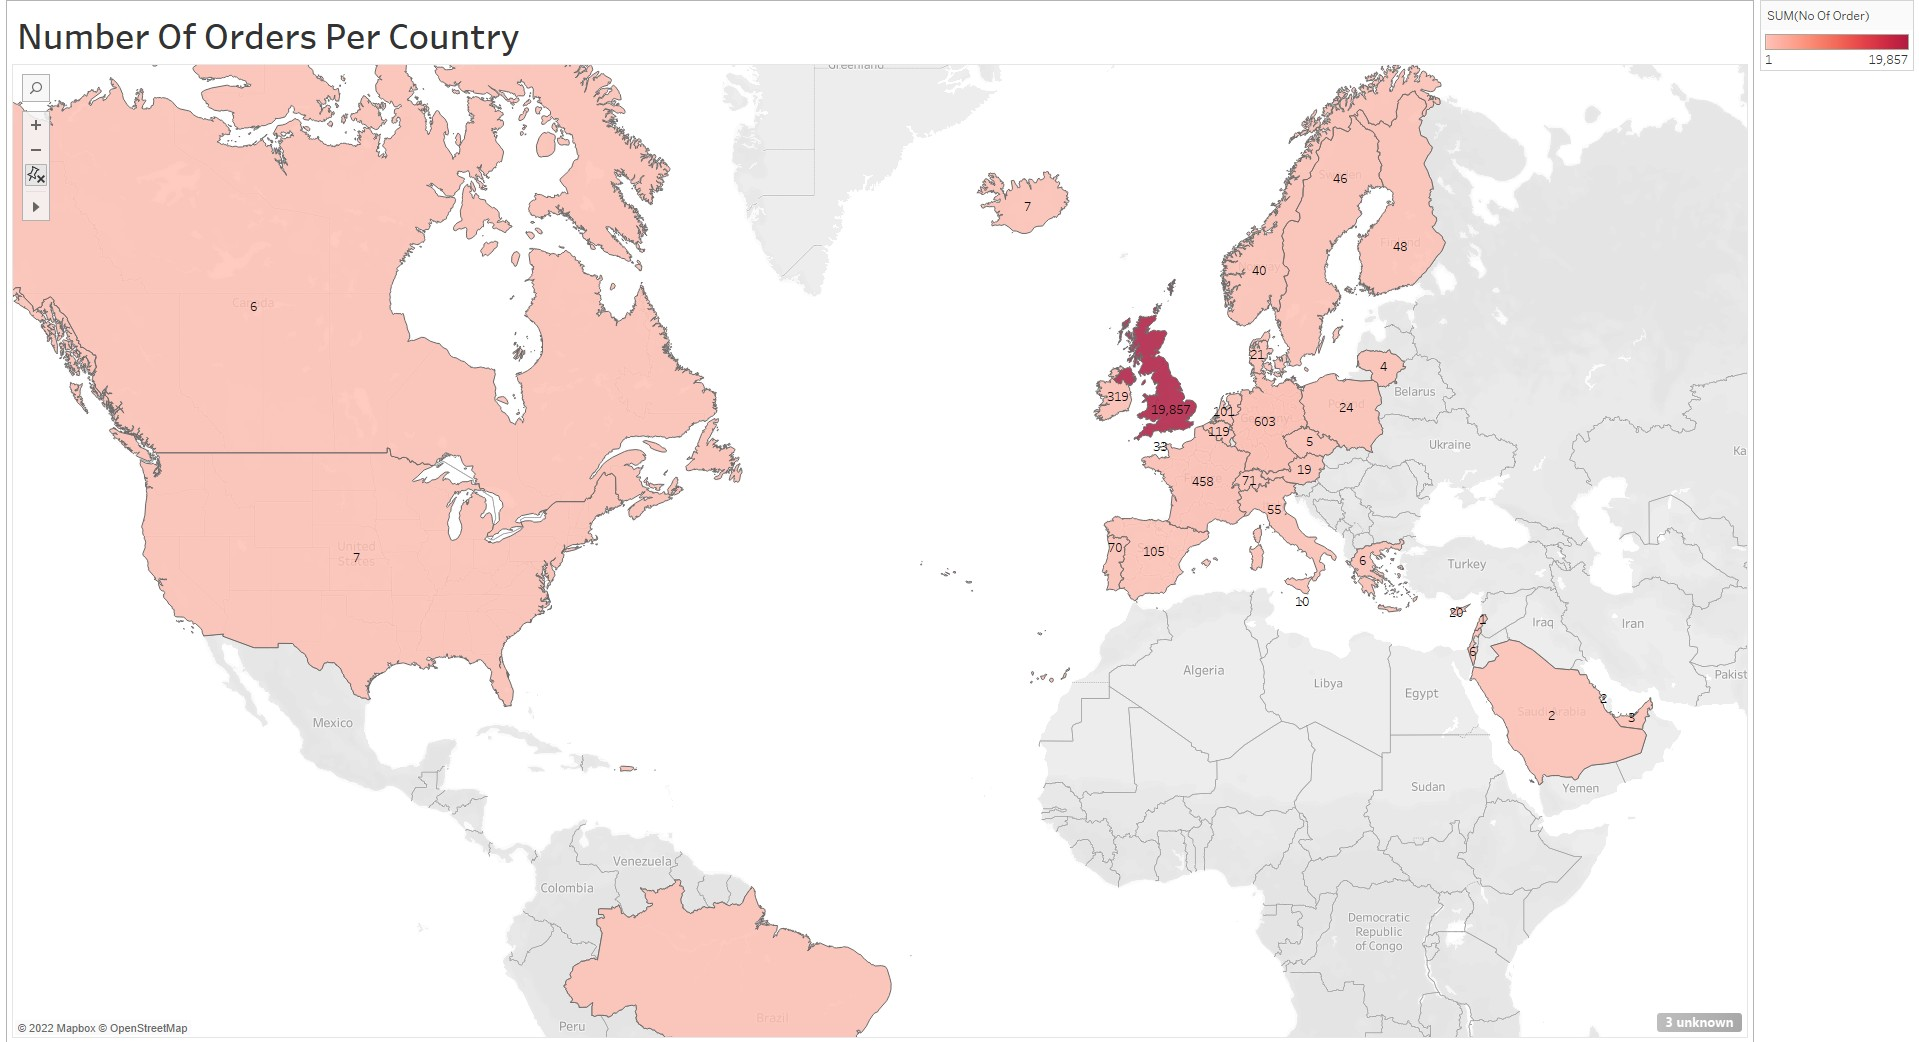

UK - highest sales

In [99]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


0 means not cancelled, vice versa

In [100]:
df.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [101]:
df["TotalRevenue"]=df["Quantity"]*df["UnitPrice"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [102]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
224147,556507,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-06-13 09:55:00,0.85,12567.0,France,10.20
506904,579161,23493,VINTAGE DOILY TRAVEL SEWING KIT,5,2011-11-28 13:56:00,1.95,17379.0,United Kingdom,9.75
16270,537646,22442,GROW YOUR OWN FLOWERS SET OF 3,1,2010-12-07 15:39:00,7.95,17591.0,United Kingdom,7.95
417307,572653,22144,CHRISTMAS CRAFT LITTLE FRIENDS,4,2011-10-25 12:12:00,2.10,15861.0,United Kingdom,8.40
207130,554976,23148,MINIATURE ANTIQUE ROSE HOOK IVORY,2,2011-05-29 10:57:00,0.83,15046.0,United Kingdom,1.66


In [103]:
round(df["TotalRevenue"].sum(),2)

8278519.42

total revenue

In [104]:
df['OrderStatus'] = [1 if 'C' in str(i) else 0 for i in df['InvoiceNo']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [105]:
df['OrderStatus'].value_counts()

0    392732
1      8872
Name: OrderStatus, dtype: int64

In [106]:
df[df["Quantity"]<=0]['OrderStatus'].value_counts()

1    8872
Name: OrderStatus, dtype: int64

In [107]:
df_orders = df[df["OrderStatus"]==0]

In [108]:
df_orders['Quantity'].min()

1

In [109]:
df_orders['Quantity'].min()
df_orders["TotalRevenue"] = df_orders["Quantity"] * df_orders["UnitPrice"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
round(df_orders["TotalRevenue"].sum(),2)

8887208.89

In [111]:
df_cancelled = df[df["OrderStatus"]==1]

In [112]:
df_cancelled

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,OrderStatus
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,1
...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,1
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,1
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,1
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,1


In [113]:
total_orders = df_cancelled['InvoiceNo'].nunique() + df_orders['InvoiceNo'].nunique()
total_orders

22190

In [114]:
cancelled_orders = df_cancelled['InvoiceNo'].nunique()
cancelled_orders

3654

In [115]:
real_orders=df_orders["InvoiceNo"].nunique()
real_orders

18536

In [116]:
percentage_of_cancelled_orders = round((cancelled_orders * 100 / total_orders), 2)

In [117]:
percentage_of_real_orders = round((real_orders * 100 / total_orders), 2)

In [118]:
print(f'Percentage of cancelled orders - {percentage_of_cancelled_orders}%')

Percentage of cancelled orders - 16.47%


In [119]:
print(f'Percentage of real orders - {percentage_of_real_orders}%')

Percentage of real orders - 83.53%


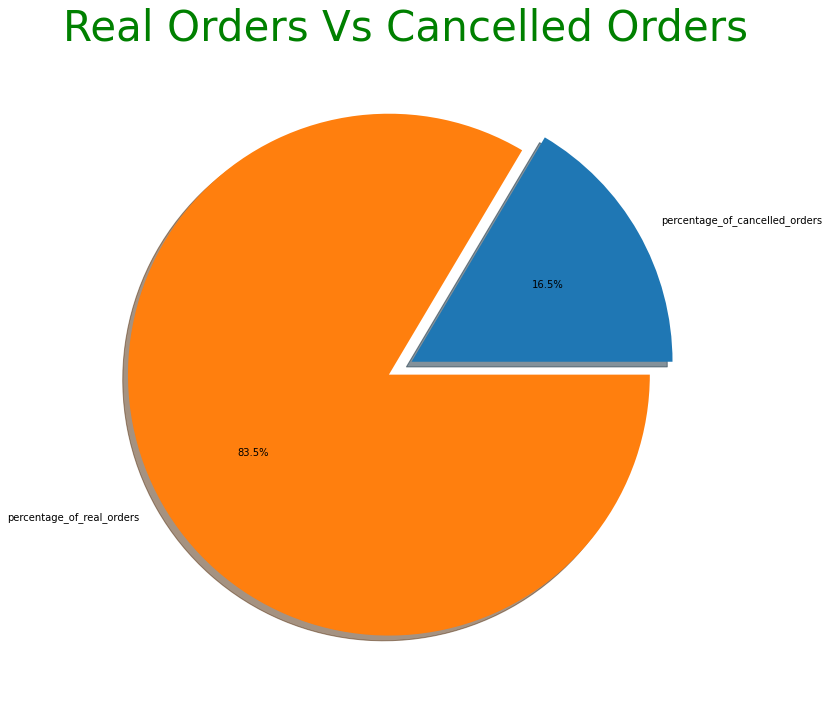

In [120]:
fig = plt.figure(figsize =(18, 12))
plt.pie([percentage_of_cancelled_orders, percentage_of_real_orders], 
        labels = ["percentage_of_cancelled_orders", "percentage_of_real_orders"],
        autopct="%1.1f%%",
        shadow=True,
        explode=(0.1,0))
plt.title('Real Orders Vs Cancelled Orders', 
          loc='left',
          fontsize=42,
          color="green")
plt.show()

In [121]:
df_orders


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,OrderStatus
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0


In [122]:
#In which months the sales were higher?
df_orders["InvoiceDate"] = pd.to_datetime(df_orders["InvoiceDate"])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [123]:
df_orders["InvoiceDate"]

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 392732, dtype: datetime64[ns]

In [124]:
df_orders["Month"]=df_orders["InvoiceDate"].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [125]:
df_orders["Month"].value_counts()

11    63182
10    48796
12    42699
9     39671
5     28075
6     26926
3     26872
8     26796
7     26582
4     22435
1     20991
2     19707
Name: Month, dtype: int64

In [126]:
df_orders["Year"] = df_orders["InvoiceDate"].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [127]:
df_orders["Year"].value_counts()

2011    367059
2010     25673
Name: Year, dtype: int64

In [128]:
total_revenue_per_month = df_orders.groupby(['Year', 'Month'])['TotalRevenue'].sum()

In [129]:
total_revenue_per_month

Year  Month
2010  12        570422.730
2011  1         568101.310
      2         446084.920
      3         594081.760
      4         468374.331
      5         677355.150
      6         660046.050
      7         598962.901
      8         644051.040
      9         950690.202
      10       1035642.450
      11       1156205.610
      12        517190.440
Name: TotalRevenue, dtype: float64

In [130]:
total_revenue_per_month.to_csv('total_revenue_per_month.csv')

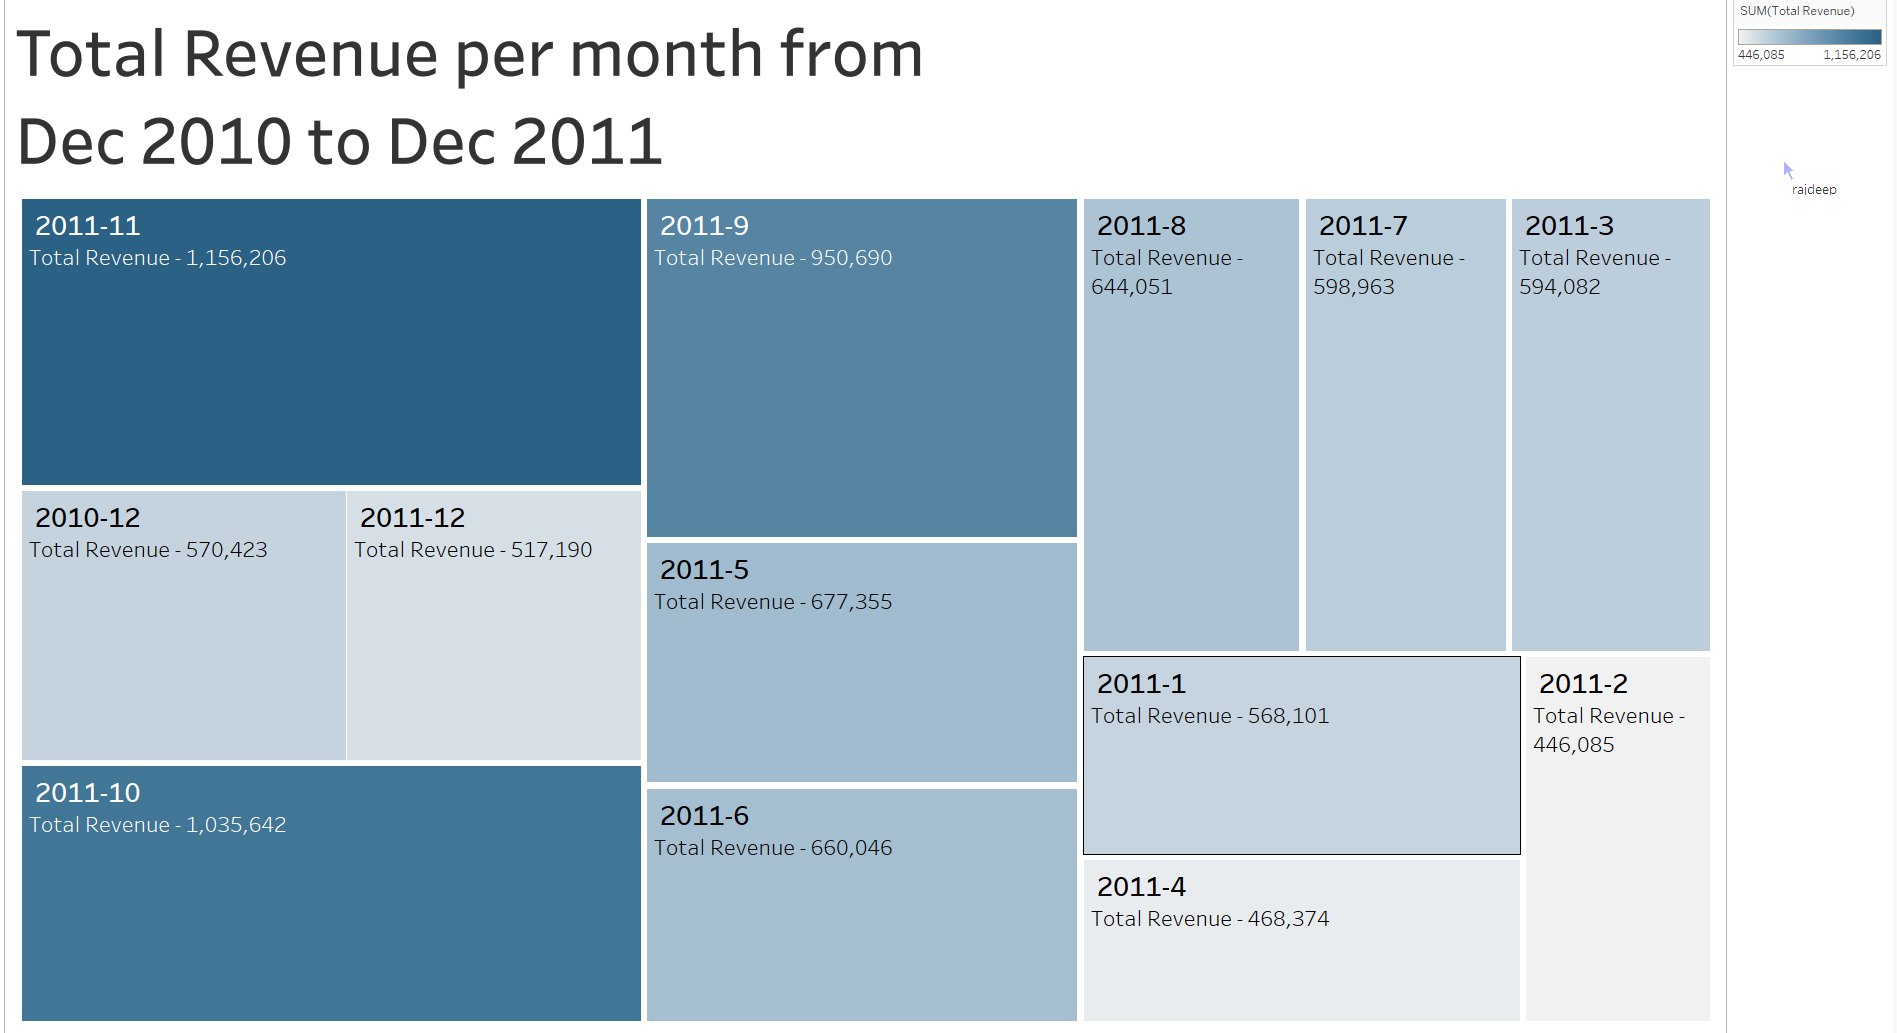

In [131]:
special_codes = df_orders[df_orders['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
special_codes

array(['POST', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'], dtype=object)

In [132]:
for code in special_codes:
  print(df_orders[df_orders['StockCode'] == code]['Description'].unique()[0])

POSTAGE
CARRIAGE
Manual
Bank Charges
PADS TO MATCH ALL CUSHIONS
DOTCOM POSTAGE


In [133]:
df_orders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,OrderStatus,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,0,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,0,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0,12,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0,12,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0,12,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0,12,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0,12,2011


In [134]:
df_orders_cleaned_stock_code = df_orders[df_orders['StockCode'].str.contains('^[1-9]+', regex=True)]

In [135]:
df_orders_cleaned_stock_code.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,OrderStatus,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,0,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,0,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0,12,2010


In [136]:
for code in special_codes:
  print(df_orders_cleaned_stock_code[df_orders_cleaned_stock_code['StockCode'] == code]['Description'])

Series([], Name: Description, dtype: object)
Series([], Name: Description, dtype: object)
Series([], Name: Description, dtype: object)
Series([], Name: Description, dtype: object)
Series([], Name: Description, dtype: object)
Series([], Name: Description, dtype: object)


In [137]:
len(df_orders_cleaned_stock_code)

391183

In [138]:
df_orders_cleaned_stock_code = df_orders_cleaned_stock_code.sort_values(by='TotalRevenue', ascending=False,ignore_index=True)

In [140]:
df_orders_cleaned_stock_code

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,OrderStatus,Month,Year
0,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60,0,12,2011
1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60,0,1,2011
2,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.00,0,6,2011
3,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450.0,United Kingdom,7144.72,0,9,2011
4,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom,6539.40,0,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
391178,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,0.00,0,11,2011
391179,569716,22778,GLASS CLOCHE SMALL,2,2011-10-06 08:17:00,0.00,15804.0,United Kingdom,0.00,0,10,2011
391180,574175,22065,CHRISTMAS PUDDING TRINKET POT,12,2011-11-03 11:47:00,0.00,14110.0,United Kingdom,0.00,0,11,2011
391181,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.00,13081.0,United Kingdom,0.00,0,1,2011


In [141]:
df_orders_cleaned_stock_code_updated = df_orders_cleaned_stock_code[['Description', 'Quantity', 'TotalRevenue', 'OrderStatus', 'StockCode']]

In [142]:
df_orders_cleaned_stock_code_updated['Description'].nunique()

3871

In [143]:
a = df_orders_cleaned_stock_code_updated[['Description', 'Quantity', 'TotalRevenue']]

In [144]:
a_updated_quantity = a.groupby(['Description']).sum().sort_values('Quantity', ascending=False).head(10)
a_updated_quantity

,Quantity,TotalRevenue
Description,,
"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
MEDIUM CERAMIC TOP STORAGE JAR,77916,81416.73
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319,13558.41
JUMBO BAG RED RETROSPOT,46078,85040.54
WHITE HANGING HEART T-LIGHT HOLDER,36706,100392.10
ASSORTED COLOUR BIRD ORNAMENT,35263,56413.03
PACK OF 72 RETROSPOT CAKE CASES,33670,16381.88
POPCORN HOLDER,30919,23417.51
RABBIT NIGHT LIGHT,27153,51251.24


In [145]:
a_updated_quantity.to_csv('top_10_items_by_quantity.csv')

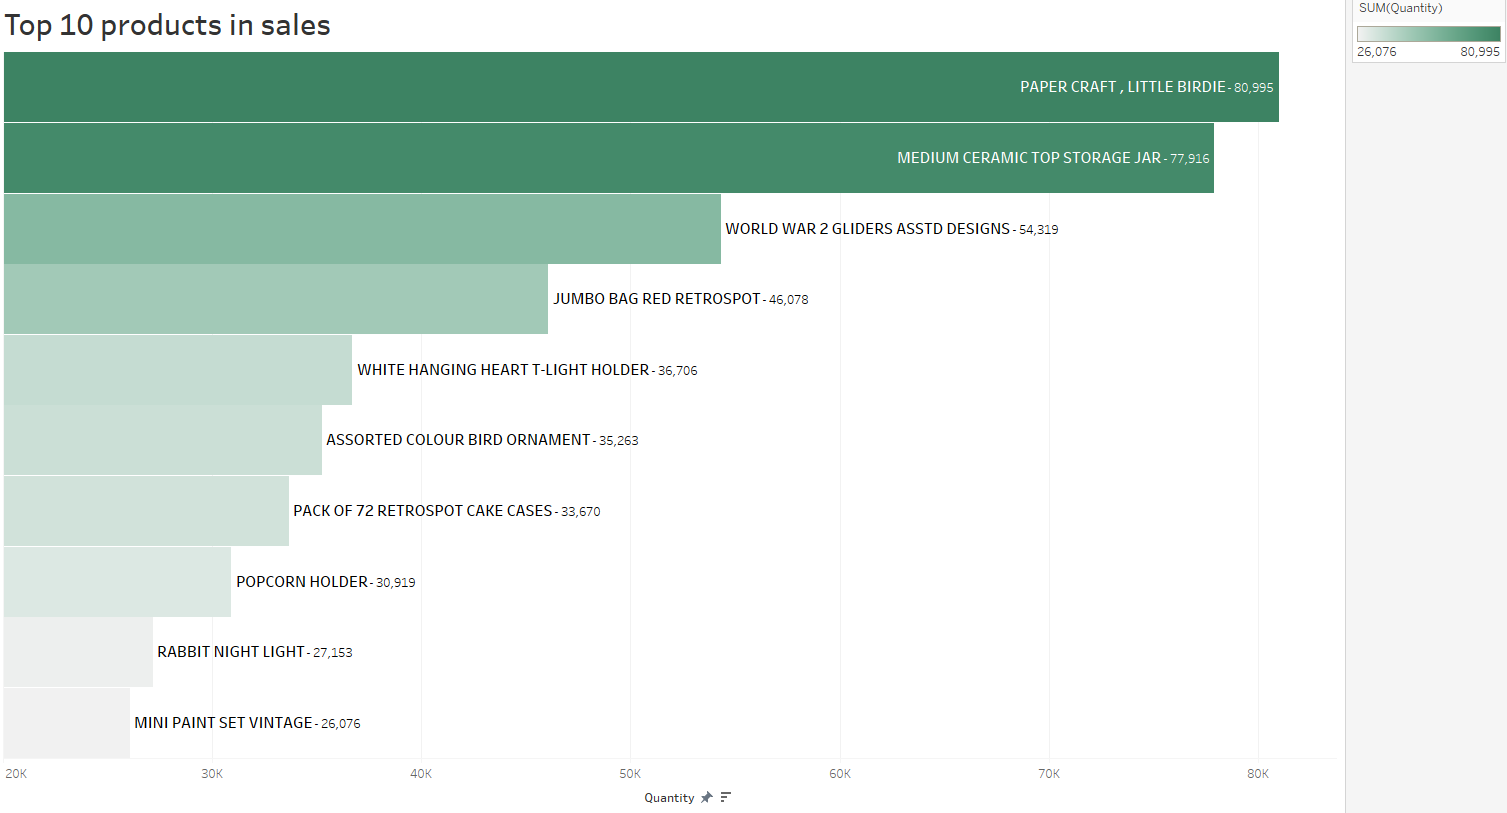

In [146]:
a_updated_revenue = a.groupby(['Description']).sum().sort_values('TotalRevenue', ascending=False).head(10)
a_updated_revenue

,Quantity,TotalRevenue
Description,,
"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
REGENCY CAKESTAND 3 TIER,12384,142264.75
WHITE HANGING HEART T-LIGHT HOLDER,36706,100392.10
JUMBO BAG RED RETROSPOT,46078,85040.54
MEDIUM CERAMIC TOP STORAGE JAR,77916,81416.73
PARTY BUNTING,15283,68785.23
ASSORTED COLOUR BIRD ORNAMENT,35263,56413.03
RABBIT NIGHT LIGHT,27153,51251.24
CHILLI LIGHTS,9646,46265.11


In [147]:
a_updated_revenue.to_csv('top_10_items_by_revenue.csv')

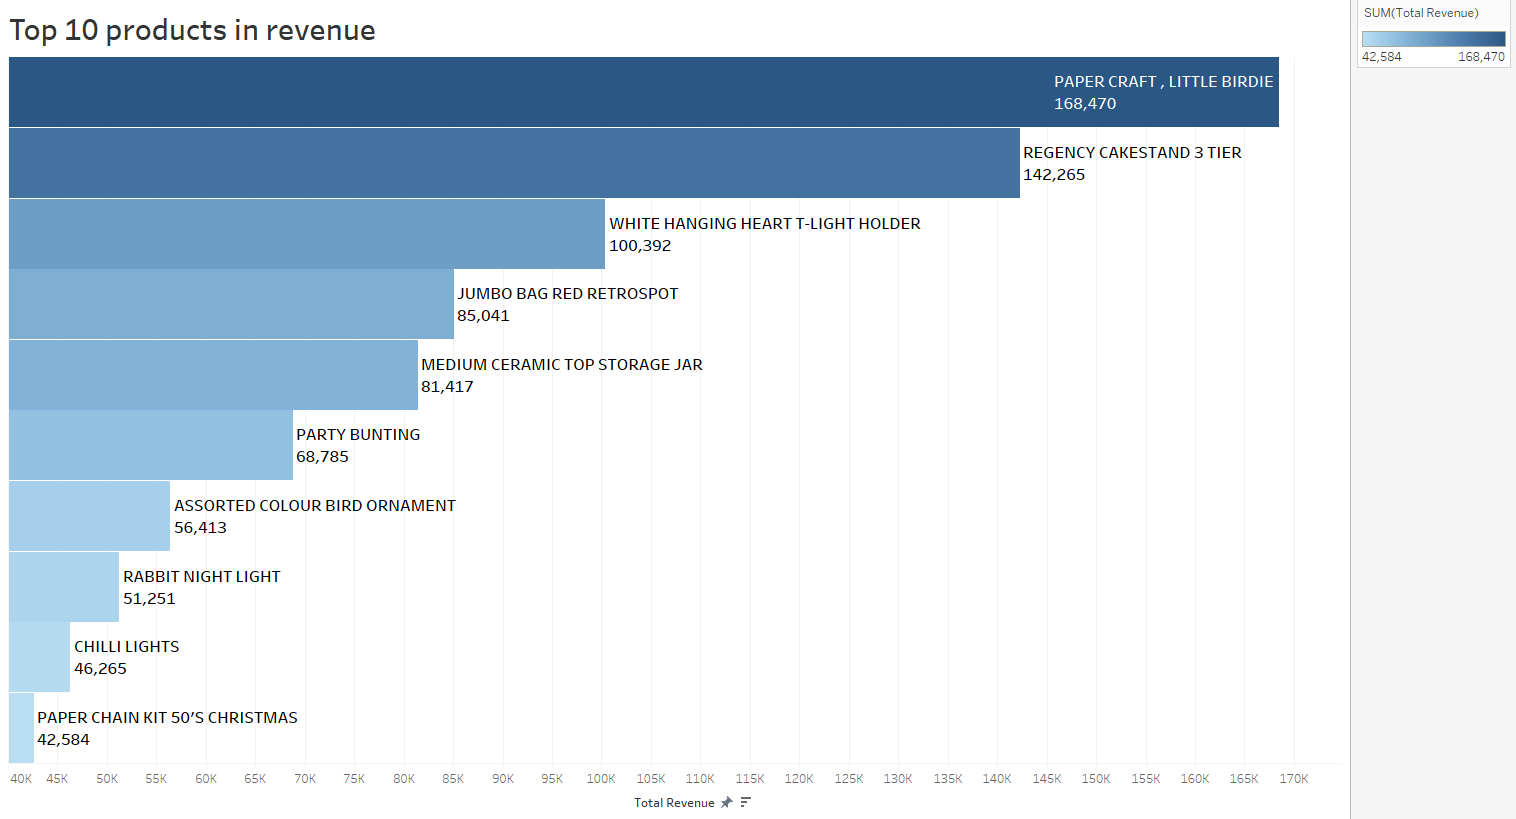

run these previous few codes to generate for cancelled orders

group by country as done with description

In [148]:
df_orders_cleaned_stock_code_updated_2 = df_orders_cleaned_stock_code[['Country', 'Quantity', 'TotalRevenue', 'OrderStatus', 'StockCode']]

In [149]:
df_orders_cleaned_stock_code_updated_2['Country'].nunique()

37

In [150]:
b = df_orders_cleaned_stock_code_updated_2[['Country', 'Quantity', 'TotalRevenue']]

In [151]:
b_updated_quantity_by_country = b.groupby(['Country']).sum().sort_values('Quantity', ascending=False).head(10)
b_updated_quantity_by_country

,Quantity,TotalRevenue
Country,,
United Kingdom,4247040,7242855.32
Netherlands,200834,283889.34
EIRE,140283,257013.12
Germany,118033,205381.15
France,110594,183801.94
Australia,84198,138103.81
Sweden,36037,36828.83
Switzerland,29981,52441.95
Spain,27735,55706.56


In [152]:
b_updated_quantity_by_country.to_csv('top_10_items_by_quantity_by_country.csv')

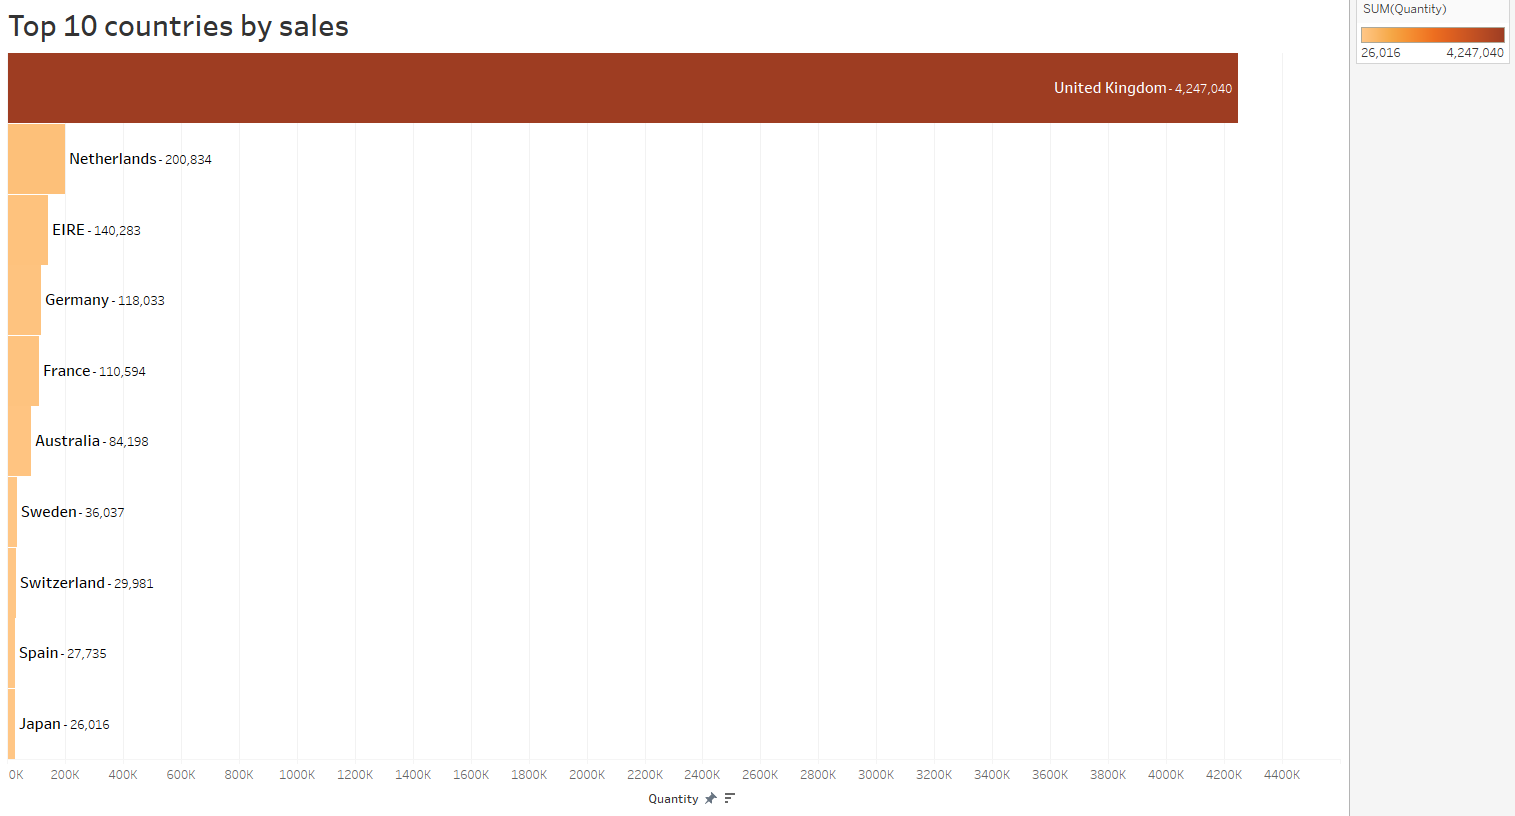

In [153]:
b_updated_revenue_by_country = b.groupby(['Country']).sum().sort_values('TotalRevenue', ascending=False).head(10)
b_updated_revenue_by_country

,Quantity,TotalRevenue
Country,,
United Kingdom,4247040,7242855.32
Netherlands,200834,283889.34
EIRE,140283,257013.12
Germany,118033,205381.15
France,110594,183801.94
Australia,84198,138103.81
Spain,27735,55706.56
Switzerland,29981,52441.95
Japan,26016,37416.37


In [154]:
b_updated_revenue_by_country.to_csv('top_10_items_by_revenue_by_country.csv')

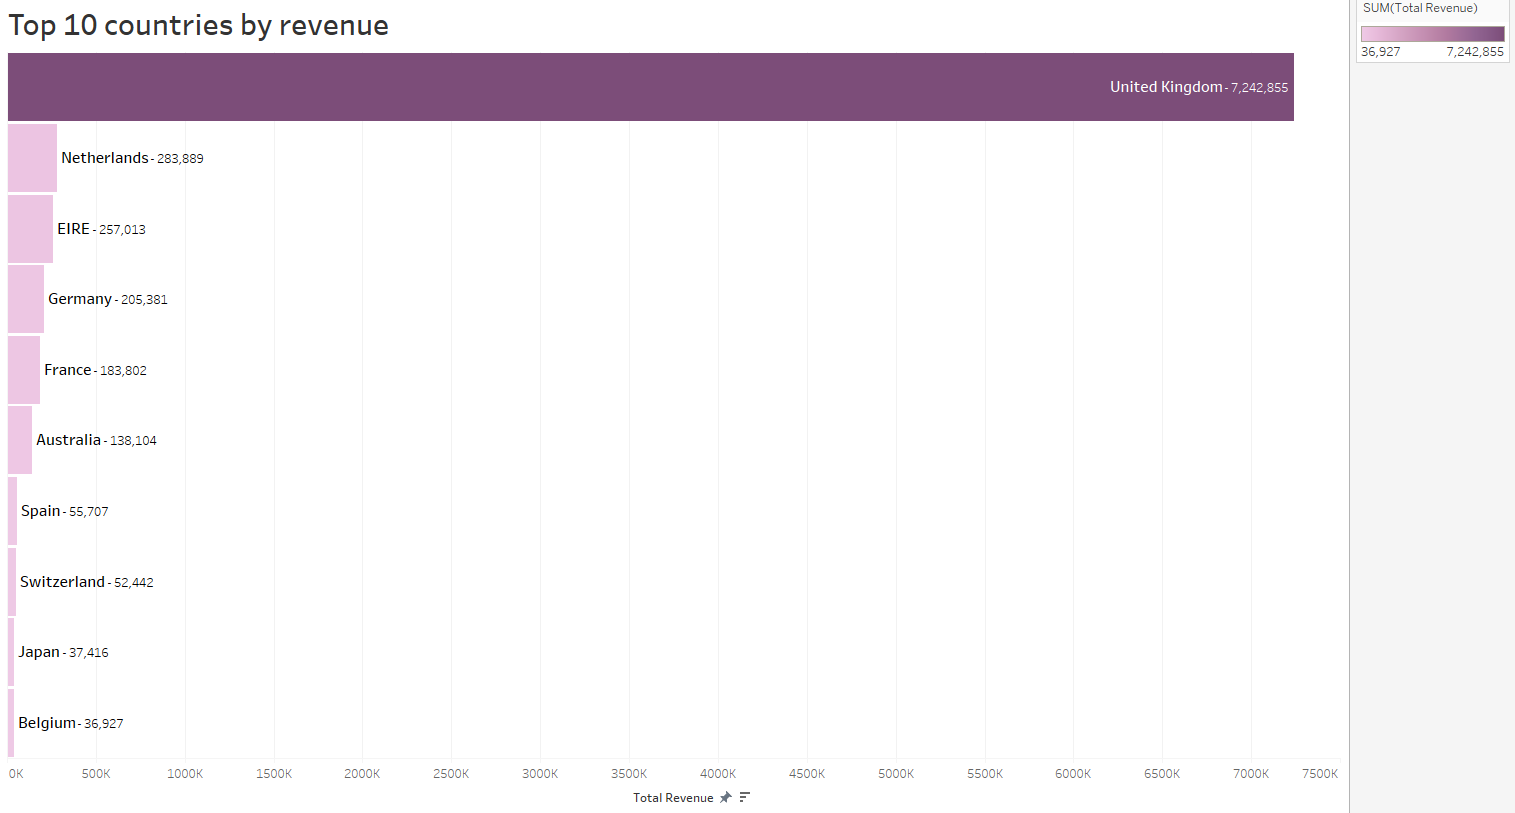

In [155]:
df_cancelled

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,OrderStatus
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,1
...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,1
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,1
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,1
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,1


In [156]:
special_codes = df_cancelled[df_cancelled['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
special_codes

array(['D', 'POST', 'M', 'C2', 'CRUK'], dtype=object)

In [157]:
for code in special_codes:
  print(df_cancelled[df_cancelled['StockCode'] == code]['Description'].unique()[0])

Discount
POSTAGE
Manual
CARRIAGE
CRUK Commission


In [158]:
df_cancelled_cleaned_stock_code = df_cancelled[df_cancelled['StockCode'].str.contains('^[1-9]+', regex=True)]
df_cancelled_cleaned_stock_code.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,OrderStatus
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,1
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,1


In [162]:
df_cancelled_cleaned_stock_code = df_cancelled_cleaned_stock_code.sort_values(by='TotalRevenue',ignore_index=True)
df_cancelled_cleaned_stock_code.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,OrderStatus
0,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.6,1
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6,1
2,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom,-6539.4,1
3,C550456,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1930,2011-04-18 13:08:00,2.55,15749.0,United Kingdom,-4921.5,1
4,C550456,48185,DOORMAT FAIRY CAKE,-670,2011-04-18 13:08:00,6.75,15749.0,United Kingdom,-4522.5,1


In [180]:
df_cancelled_cleaned_stock_code_updated = df_cancelled_cleaned_stock_code[['Description', 'Quantity', 'TotalRevenue']]
df_cancelled_cleaned_stock_code_updated.head()

,Description,Quantity,TotalRevenue
0,"PAPER CRAFT , LITTLE BIRDIE",-80995,-168469.6
1,MEDIUM CERAMIC TOP STORAGE JAR,-74215,-77183.6
2,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,-6539.4
3,WHITE HANGING HEART T-LIGHT HOLDER,-1930,-4921.5
4,DOORMAT FAIRY CAKE,-670,-4522.5


In [192]:
a_updated_quantity=df_cancelled_cleaned_stock_code_updated.groupby("Description").sum().sort_values("Quantity").head(10)
a_updated_quantity["Quantity"]=a_updated_quantity["Quantity"].abs()
a_updated_quantity["TotalRevenue"]=a_updated_quantity["TotalRevenue"].abs()
a_updated_quantity

,Quantity,TotalRevenue
Description,,
"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
MEDIUM CERAMIC TOP STORAGE JAR,74494,77479.64
ROTATING SILVER ANGELS T-LIGHT HLDR,9367,298.65
FAIRY CAKE FLANNEL ASSORTED COLOUR,3150,6591.42
WHITE HANGING HEART T-LIGHT HOLDER,2578,6624.30
GIN + TONIC DIET METAL SIGN,2030,3775.33
HERB MARKER BASIL,1527,841.05
FELTCRAFT DOLL MOLLY,1447,3512.65
TEA TIME PARTY BUNTING,1424,3692.95


In [193]:
a_updated_quantity.to_csv('top_10_cancelled_items_by_quantity.csv')

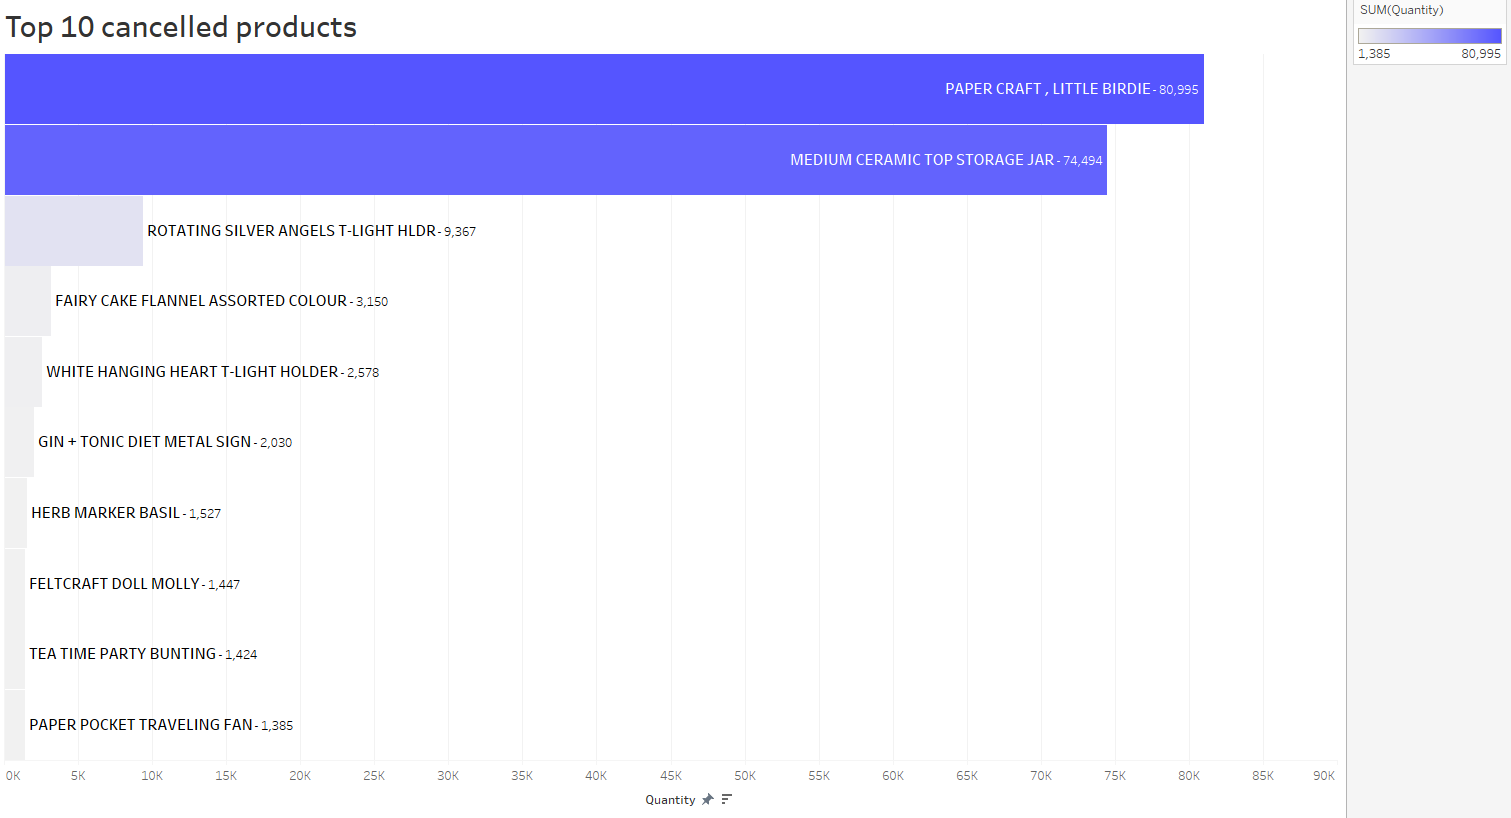